# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 33133416.20it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1569013.58it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9064553.05it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7108406.26it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 60


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-1.0380,  0.5397, -0.7719, -0.4364, -0.1829, -0.7193, -0.8983, -1.2261,
          0.4032,  0.3223]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [8]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f'Época: {i}/{n_epochs - 1}, batch: {k}/{len(loader_train)}')

Época: 0/4, batch: 0/60
Época: 0/4, batch: 1/60
Época: 0/4, batch: 2/60
Época: 0/4, batch: 3/60
Época: 0/4, batch: 4/60
Época: 0/4, batch: 5/60
Época: 0/4, batch: 6/60
Época: 0/4, batch: 7/60
Época: 0/4, batch: 8/60
Época: 0/4, batch: 9/60
Época: 0/4, batch: 10/60
Época: 0/4, batch: 11/60
Época: 0/4, batch: 12/60
Época: 0/4, batch: 13/60
Época: 0/4, batch: 14/60
Época: 0/4, batch: 15/60
Época: 0/4, batch: 16/60
Época: 0/4, batch: 17/60
Época: 0/4, batch: 18/60
Época: 0/4, batch: 19/60
Época: 0/4, batch: 20/60
Época: 0/4, batch: 21/60
Época: 0/4, batch: 22/60
Época: 0/4, batch: 23/60
Época: 0/4, batch: 24/60
Época: 0/4, batch: 25/60
Época: 0/4, batch: 26/60
Época: 0/4, batch: 27/60
Época: 0/4, batch: 28/60
Época: 0/4, batch: 29/60
Época: 0/4, batch: 30/60
Época: 0/4, batch: 31/60
Época: 0/4, batch: 32/60
Época: 0/4, batch: 33/60
Época: 0/4, batch: 34/60
Época: 0/4, batch: 35/60
Época: 0/4, batch: 36/60
Época: 0/4, batch: 37/60
Época: 0/4, batch: 38/60
Época: 0/4, batch: 39/60
Época: 0/4

Época: 1/4, batch: 600

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.2568)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

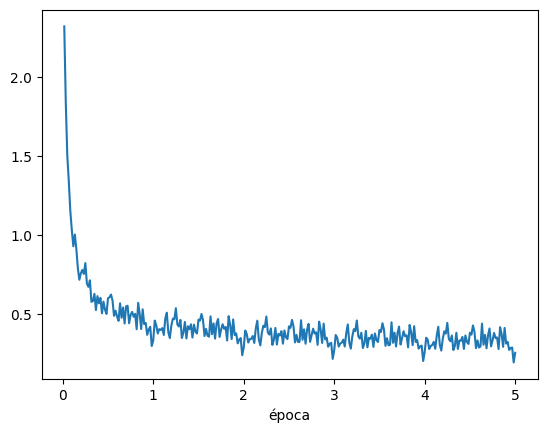

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

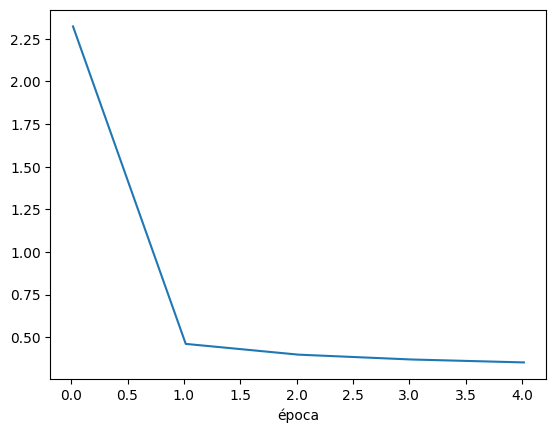

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

1.
1000

2.
O número de mini-batches por época é calculado pela divisão do total de amostras pelo tamanho do mini-batch.

In [13]:
#Número de minibatches de treinamento: 60 (pois o dataset MNIST de treinamento contém 60,000 amostras).
len(loader_train)

60

3.
Uma época é definida como um ciclo completo pelo qual o algoritmo de treinamento passa por todo o conjunto de dados uma vez. Cada amostra no conjunto de dados é utilizada uma vez para atualizar os pesos da rede neural.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [14]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)
        loss = criterion(outputs, Variable(y_train))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f'Época: {i}/{n_epochs - 1}, batch: {k}/{len(loader_train) - 1}')

print('Final loss:', loss.data)

Época: 0/4, batch: 0/59
Época: 0/4, batch: 1/59
Época: 0/4, batch: 2/59
Época: 0/4, batch: 3/59
Época: 0/4, batch: 4/59
Época: 0/4, batch: 5/59
Época: 0/4, batch: 6/59
Época: 0/4, batch: 7/59
Época: 0/4, batch: 8/59
Época: 0/4, batch: 9/59
Época: 0/4, batch: 10/59
Época: 0/4, batch: 11/59
Época: 0/4, batch: 12/59
Época: 0/4, batch: 13/59
Época: 0/4, batch: 14/59
Época: 0/4, batch: 15/59
Época: 0/4, batch: 16/59
Época: 0/4, batch: 17/59
Época: 0/4, batch: 18/59
Época: 0/4, batch: 19/59
Época: 0/4, batch: 20/59
Época: 0/4, batch: 21/59
Época: 0/4, batch: 22/59
Época: 0/4, batch: 23/59
Época: 0/4, batch: 24/59
Época: 0/4, batch: 25/59
Época: 0/4, batch: 26/59
Época: 0/4, batch: 27/59
Época: 0/4, batch: 28/59
Época: 0/4, batch: 29/59
Época: 0/4, batch: 30/59
Época: 0/4, batch: 31/59
Época: 0/4, batch: 32/59
Época: 0/4, batch: 33/59
Época: 0/4, batch: 34/59
Época: 0/4, batch: 35/59
Época: 0/4, batch: 36/59
Época: 0/4, batch: 37/59
Época: 0/4, batch: 38/59
Época: 0/4, batch: 39/59
Época: 0/4

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

##Tive que reduzir para que o código retornasse, estava demorando demais

In [ ]:
#Testando com 64, 256 e 512

In [21]:
n_epochs = 5
learning_rate = 0.5
batch_sizes = [64, 256, 512]

dataset_train = MNIST(root='./MNIST', train=True, download=True, transform=torchvision.transforms.ToTensor())

dataset_train = torch.utils.data.Subset(dataset_train, range(100))

model = torch.nn.Linear(28 * 28, 10)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Treinando com batch_size=64
Época: 0/4, batch: 0/1, Loss: 2.3412983417510986
Época: 0/4, batch: 1/1, Loss: 1.9450764656066895
Época: 1/4, batch: 0/1, Loss: 2.566179037094116
Época: 1/4, batch: 1/1, Loss: 2.1179373264312744
Época: 2/4, batch: 0/1, Loss: 1.4868834018707275
Época: 2/4, batch: 1/1, Loss: 0.8533568382263184
Época: 3/4, batch: 0/1, Loss: 0.5653039216995239
Época: 3/4, batch: 1/1, Loss: 0.5370303392410278
Época: 4/4, batch: 0/1, Loss: 0.35559409856796265
Época: 4/4, batch: 1/1, Loss: 0.4424358606338501
Treinando com batch_size=256
Época: 0/4, batch: 0/0, Loss: 0.31532761454582214
Época: 1/4, batch: 0/0, Loss: 0.275749146938324
Época: 2/4, batch: 0/0, Loss: 0.2539803981781006
Época: 3/4, batch: 0/0, Loss: 0.2355218529701233
Época: 4/4, batch: 0/0, Loss: 0.2193848043680191
Treinando com batch_size=512
Época: 0/4, batch: 0/0, Loss: 0.20515373349189758
Época: 1/4, batch: 0/0, Loss: 0.19252486526966095
Época: 2/4, batch: 0/0, Loss: 0.18125514686107635
Época: 3/4, batch: 0/0, Loss:

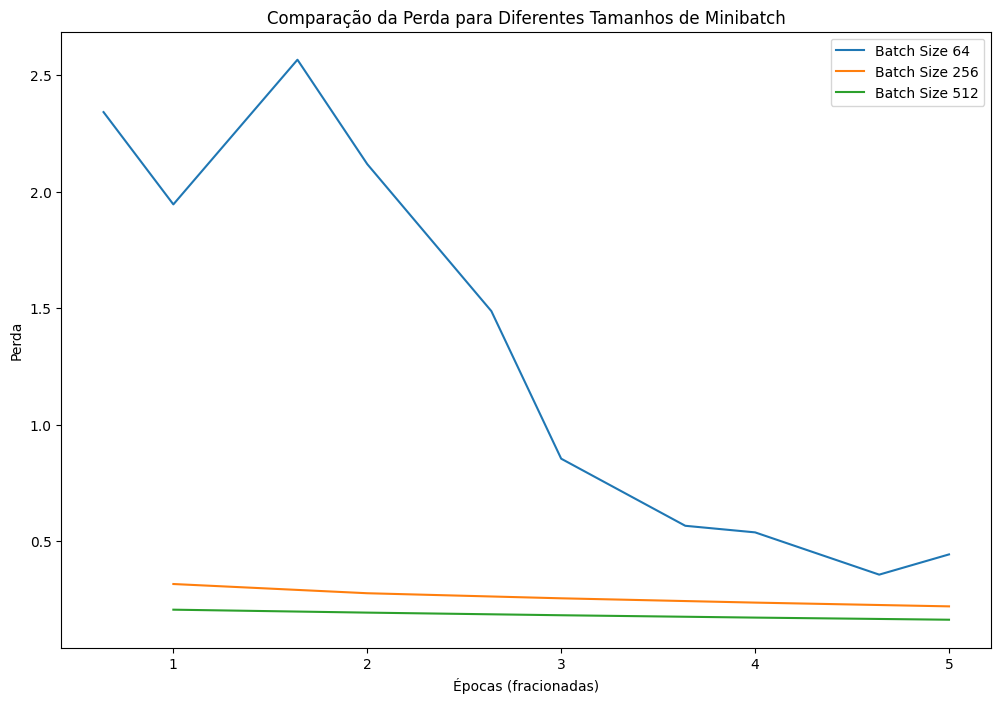

In [24]:
def train_model(batch_size):
    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    epochs = []
    losses = []
    total_trained_samples = 0

    for epoch in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / len(dataset_train))
            losses.append(loss.item())
            print(f'Época: {epoch}/{n_epochs - 1}, batch: {k}/{len(loader_train) - 1}, Loss: {loss.item()}')

    return epochs, losses

# Treinamento e armazenamento dos resultados para diferentes tamanhos de minibatch
results = {}
for batch_size in batch_sizes:
    print(f'Treinando com batch_size={batch_size}')
    epochs, losses = train_model(batch_size)
    results[batch_size] = (epochs, losses)

# Plotagem dos resultados
plt.figure(figsize=(12, 8))
for batch_size, (epochs, losses) in results.items():
    plt.plot(epochs, losses, label=f'Batch Size {batch_size}')

plt.xlabel('Épocas (fracionadas)')
plt.ylabel('Perda')
plt.legend()
plt.title('Comparação da Perda para Diferentes Tamanhos de Minibatch')
plt.show()


estamos utilizando apenas os primeiros 100 exemplos do MNIST para treinamento. Isso reduz drasticamente o tamanho do conjunto de dados, o que resulta em tempos de treinamento muito mais curtos, ideal para experimentações rápidas e comparações de tamanhos de minibatch.

## Conclusões sobre os experimentos deste notebook
